# Probedrum Loader

In [6]:
import pandas as pd
import numpy as np
import glob, locale
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 16, 'figure.figsize': [8.0, 6.0]})

Simplistic support functions for loading MXW data files and directories into Pandas structures. Note that special care is taken to convert Windows-style carriage returns, tab separation, and region specific decimal delimiters.

In [7]:
def readmxw(file):
    """ read single .mxw file into Pandas Series object """
    with open(file, 'rU') as f:
        c = lambda valstr: float(valstr.split('=')[-1])
        l = f.readline().split('\t')
        d = {'time':c(l[0]), 'T':c(l[2]), 'vol':c(l[3]), 'conc':c(l[4]), 'elec':c(l[5])}
        
    comma = lambda valstr: float(valstr.decode("utf-8").replace(',','.'))
    d['spec'] = np.genfromtxt(file, skip_header=1, converters={0:comma, 1:comma}, usecols=(0,1))
    return pd.Series(d, name=int(d['time']))

def readmxwdir(pattern):
    """ read set of .mxw files into Pandas DataFrame object """
    d = pd.DataFrame()
    for f in glob.glob(pattern):
        d = d.append( readmxw(f) )
    return d    

Let's try it out:

In [8]:
d = readmxwdir('AscData/*.mxw')
d.head()

,T,conc,elec,spec,time,vol
0,19.6,0.000000,3.40,"[[240.1041, -0.3369], [240.4007, -0.7928], [24...",0,1000.000
602,20.0,0.000000,3.46,"[[240.1041, -0.624], [240.4007, -0.8904], [240...",602,1000.000
813,20.0,0.407617,3.68,"[[240.1041, -0.6679], [240.4007, -0.7373], [24...",813,1004.093
921,20.0,0.785351,3.84,"[[240.1041, -0.5926], [240.4007, -0.7725], [24...",921,1007.916
1030,20.0,1.405016,4.03,"[[240.1041, -0.4213], [240.4007, -0.8435], [24...",1030,1014.250


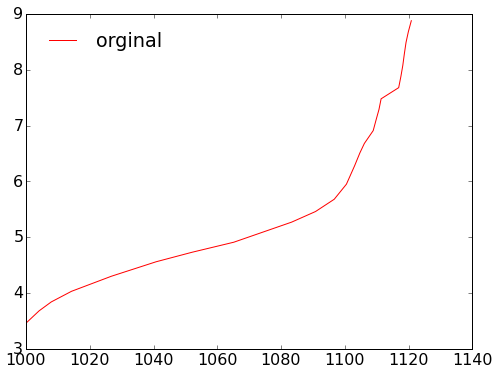

In [9]:
plt.plot( d.vol, d.elec, 'r-', label='orginal' )
plt.legend(loc=0, frameon=False)

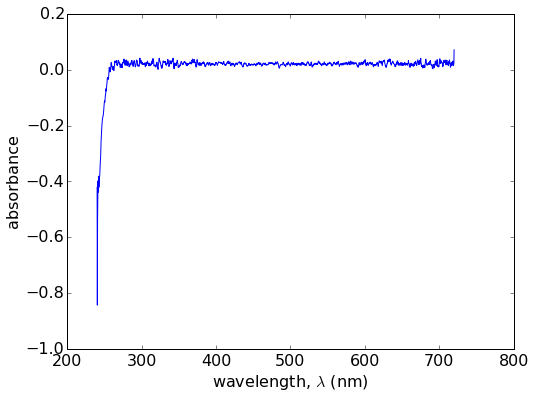

In [10]:
# plot spectrum at pH 4.03
s = d[ d.elec==4.03 ].spec.values[0]
plt.plot(s[:,0], s[:,1])
plt.xlabel(r'wavelength, $\lambda$ (nm)')
plt.ylabel(r'absorbance')